In [97]:
import pandas as pd
import seaborn as sns
import statsmodels as sm
import matplotlib
from statsmodels.stats.weightstats import DescrStatsW, zconfint, ztest
import numpy as np
from scipy.stats import normaltest, ranksums, ttest_ind

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# checar as versões instaladas de cada pacote

print("Pandas: ", pd.__version__)
print("Seaborn: ", sns.__version__)
print("Statsmodels: ", sm.__version__)
print("Numpy: ", np.__version__)
print("Matplotlib: ", matplotlib.__version__)

Pandas:  1.3.4
Seaborn:  0.11.2
Statsmodels:  0.13.2
Numpy:  1.20.3
Matplotlib:  3.4.3


## Analisando conjunto com os dados do TMDB 5000

In [5]:
# importando os dados

tmdb = pd.read_csv("tmdb_5000_movies.csv")

In [6]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


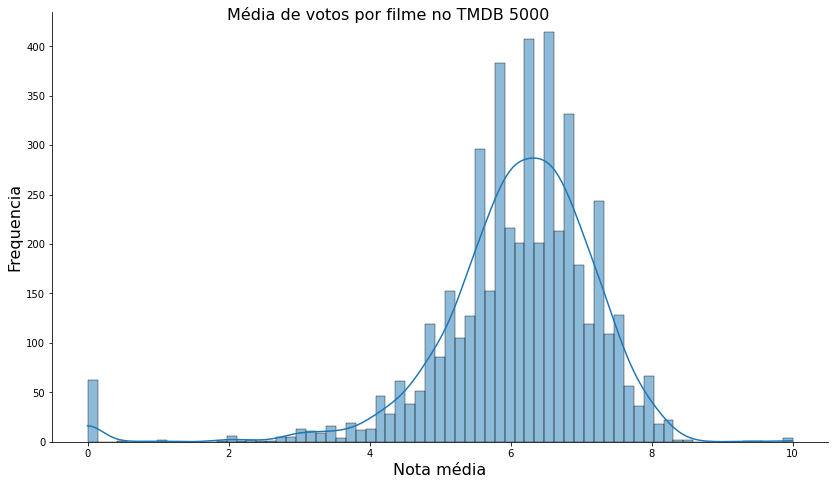

In [8]:
ax = sns.displot(data=tmdb, x="vote_average", kde=True)
ax.set_xlabels("Nota média", fontsize=16)
ax.set_ylabels("Frequencia", fontsize=16)
ax.figure.suptitle("Média de votos por filme no TMDB 5000", fontsize=16)
ax.figure.set_size_inches(13, 7)
ax

<AxesSubplot:xlabel='Nota média do filme'>

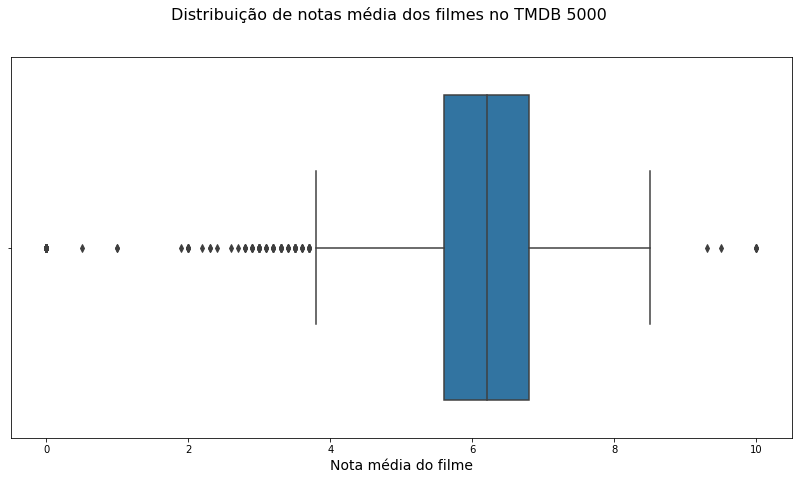

In [9]:
ax = sns.boxplot(data=tmdb, x="vote_average")
ax.figure.set_size_inches(14, 7)
ax.figure.suptitle("Distribuição de notas média dos filmes no TMDB 5000", fontsize=16)
ax.set_xlabel("Nota média do filme", fontdict={"fontsize": 14})
ax

In [10]:
tmdb.query("vote_average == 0")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 37, ""nam...",NaN,69382,[],en,The Legend of God's Gun,A gun-slinging preacher returns to the debauch...,0.003582,[],[],2007-07-08,0,78.0,[],Released,NaN,The Legend of God's Gun,0.0,0
4771,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,220490,[],en,Her Cry: La Llorona Investigation,"Crew of ""Paranormal Legends"" went to film thei...",0.056459,[],[],2013-04-19,0,89.0,[],Released,NaN,Her Cry: La Llorona Investigation,0.0,0
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],[],2015-10-02,0,90.0,[],Released,NaN,Dutch Kills,0.0,0
4785,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],"[{""iso_3166_1"": ""KE"", ""name"": ""Kenya""}]",2014-09-05,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0


In [11]:
tmdb_com_mais_de_10_votos = tmdb.query("vote_count >= 10")
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


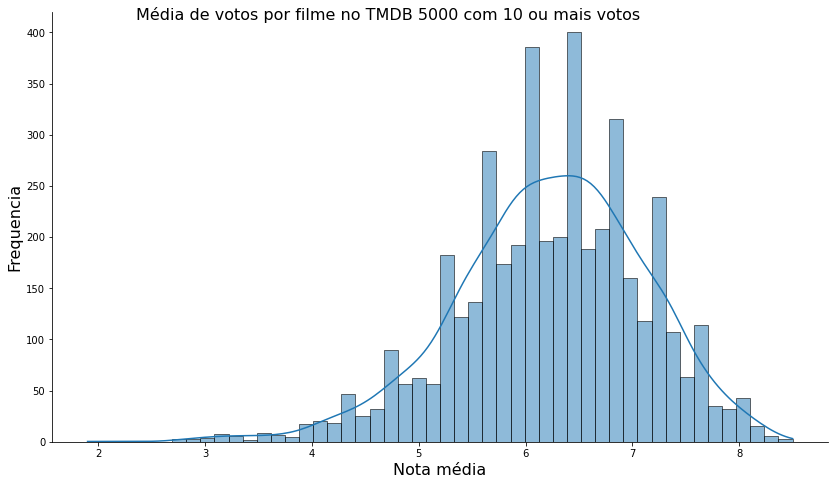

In [12]:
ax = sns.displot(data=tmdb_com_mais_de_10_votos, x="vote_average", kde=True)
ax.set_xlabels("Nota média", fontsize=16)
ax.set_ylabels("Frequencia", fontsize=16)
ax.figure.suptitle("Média de votos por filme no TMDB 5000 com 10 ou mais votos", fontsize=16)
ax.figure.set_size_inches(13, 7)
ax

<AxesSubplot:xlabel='Nota média do filme'>

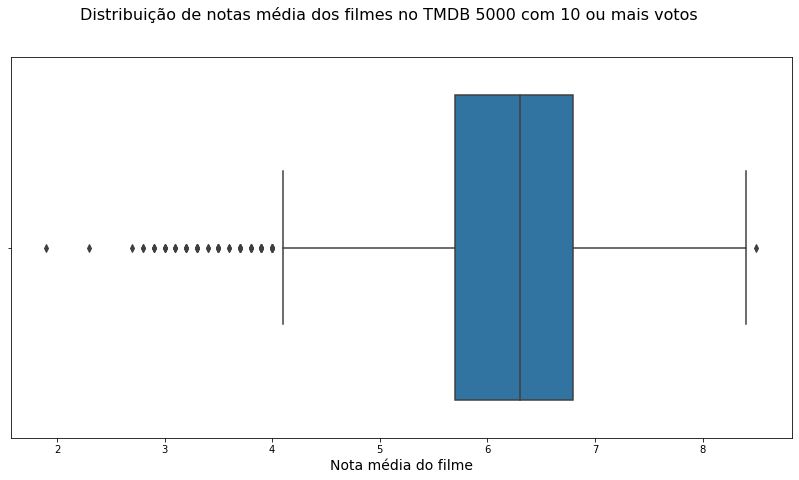

In [13]:
ax = sns.boxplot(data=tmdb_com_mais_de_10_votos, x="vote_average")
ax.figure.set_size_inches(14, 7)
ax.figure.suptitle("Distribuição de notas média dos filmes no TMDB 5000 com 10 ou mais votos", fontsize=16)
ax.set_xlabel("Nota média do filme", fontdict={"fontsize": 14})
ax

## Analisando conjunto com os dados do MovieLens

In [14]:
notas = pd.read_csv("ratings.csv")

In [15]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
nota_media_por_filme = notas.groupby("movieId").mean()["rating"]
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

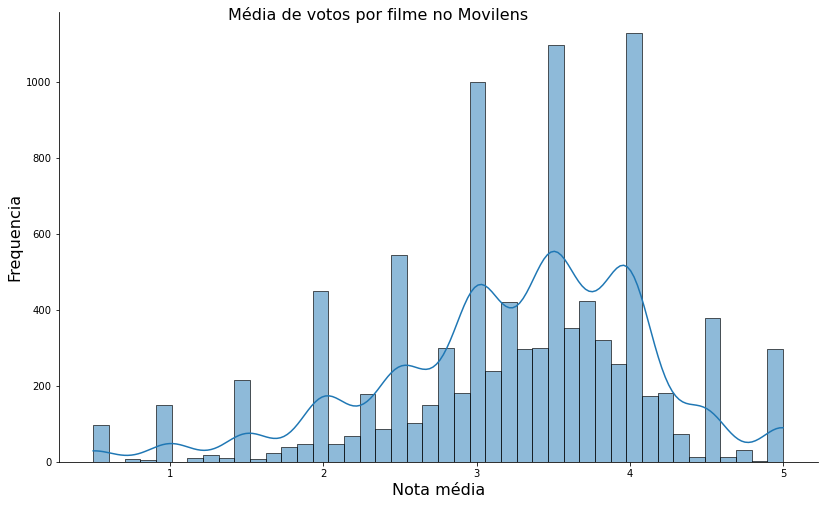

In [17]:
ax = sns.displot(data=nota_media_por_filme.values, kde=True)
ax.set_xlabels("Nota média", fontsize=16)
ax.set_ylabels("Frequencia", fontsize=16)
ax.figure.suptitle("Média de votos por filme no Movilens", fontsize=16)
ax.figure.set_size_inches(13, 7)
ax

In [18]:
quantidade_de_votos_por_filme = notas.groupby("movieId").count()
quantidade_de_votos_por_filme.head()

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49


In [19]:
quantidade_de_votos_por_filme.query("rating >= 10")

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
5,49,49,49
6,102,102,102
...,...,...,...
174055,13,13,13
176371,18,18,18
177765,13,13,13


In [20]:
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query("rating >= 10").index
filmes_com_pelo_menos_10_votos

Int64Index([     1,      2,      3,      5,      6,      7,      9,     10,
                11,     12,
            ...
            166461, 166528, 166643, 168250, 168252, 174055, 176371, 177765,
            179819, 187593],
           dtype='int64', name='movieId', length=2269)

In [21]:
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos.values]
nota_media_dos_filmes_com_pelo_menos_10_votos

movieId
1         3.920930
2         3.431818
3         3.259615
5         3.071429
6         3.946078
            ...   
174055    3.423077
176371    3.805556
177765    3.538462
179819    3.125000
187593    3.875000
Name: rating, Length: 2269, dtype: float64

In [22]:
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

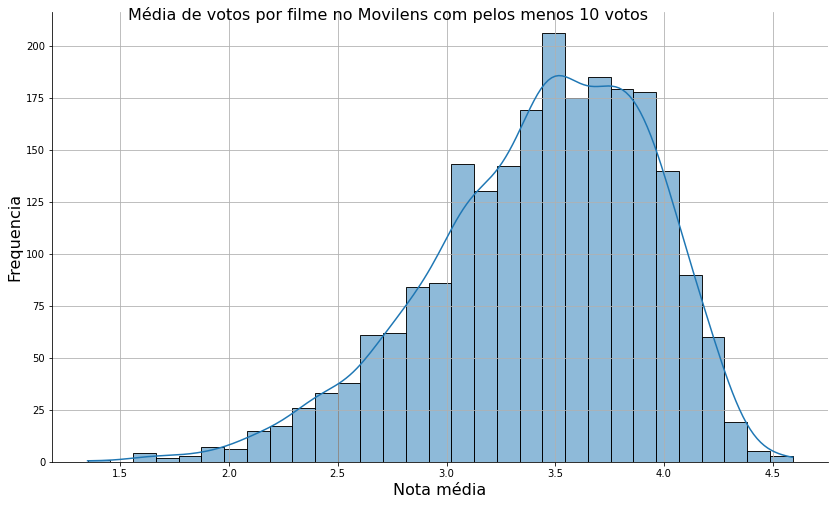

In [23]:
ax = sns.displot(data=nota_media_dos_filmes_com_pelo_menos_10_votos.values, kde=True)
ax.set_xlabels("Nota média", fontsize=16)
ax.set_ylabels("Frequencia", fontsize=16)
ax.figure.suptitle("Média de votos por filme no Movilens com pelos menos 10 votos", fontsize=16)
ax.figure.set_size_inches(13, 7)
ax
plt.grid()

<AxesSubplot:xlabel='Nota média do filme'>

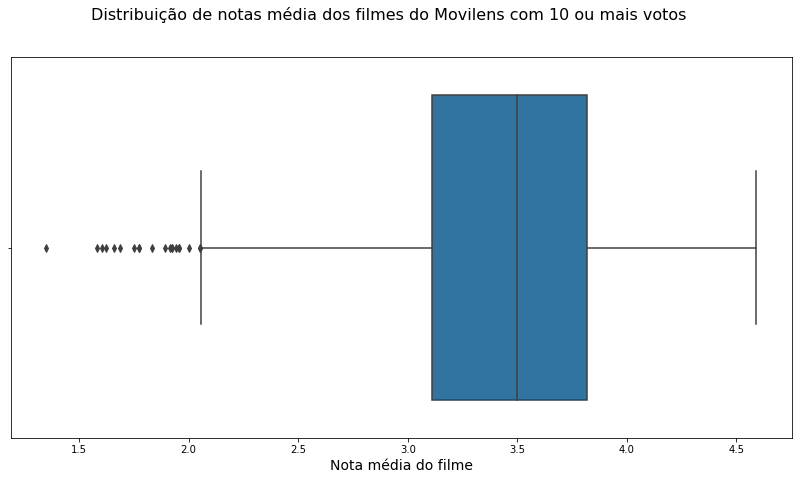

In [24]:
ax = sns.boxplot(x=nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.figure.set_size_inches(14, 7)
ax.figure.suptitle("Distribuição de notas média dos filmes do Movilens com 10 ou mais votos", fontsize=16)
ax.set_xlabel("Nota média do filme", fontdict={"fontsize": 14})
ax

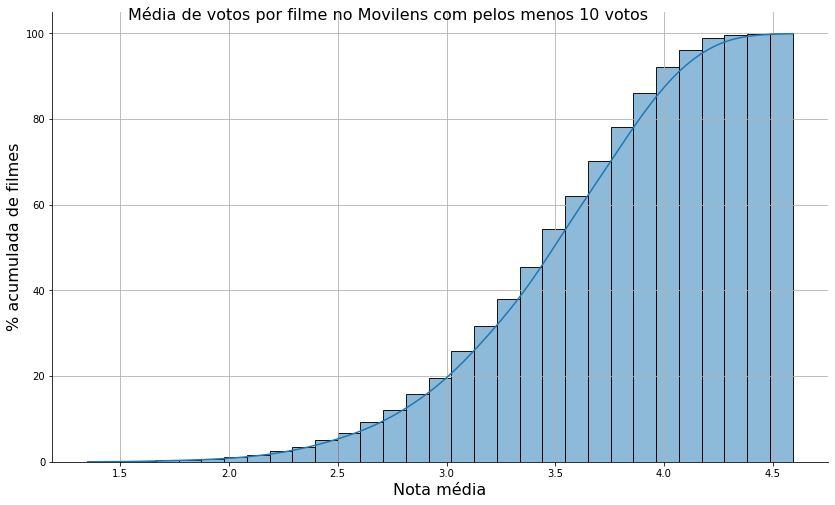

In [25]:
ax = sns.displot(
    data=nota_media_dos_filmes_com_pelo_menos_10_votos.values, 
    kde=True, 
    cumulative=True,
    stat="percent"
)
ax.set_xlabels("Nota média", fontsize=16)
ax.set_ylabels("% acumulada de filmes", fontsize=16)
ax.figure.suptitle("Média de votos por filme no Movilens com pelos menos 10 votos", fontsize=16)
ax.figure.set_size_inches(13, 7)
ax
plt.grid()

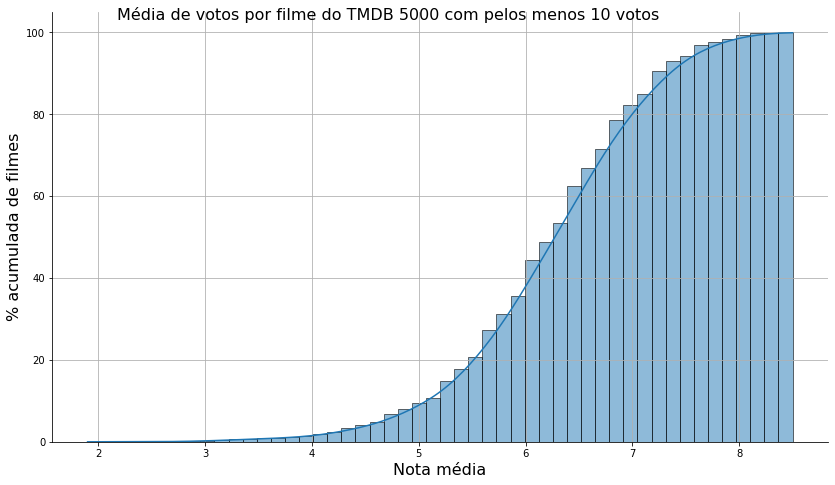

In [26]:
ax = sns.displot(
    data=tmdb_com_mais_de_10_votos,
    x="vote_average",
    kde=True, 
    cumulative=True,
    stat="percent"
)
ax.set_xlabels("Nota média", fontsize=16)
ax.set_ylabels("% acumulada de filmes", fontsize=16)
ax.figure.suptitle("Média de votos por filme do TMDB 5000 com pelos menos 10 votos", fontsize=16)
ax.figure.set_size_inches(13, 7)
ax
plt.grid()

## Analisando a distribuição dos dados capturados de outros campos do TMDB

In [27]:
tmdb_com_mais_de_10_votos.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [28]:
tmdb_com_mais_de_10_votos["vote_count"]

0       11800
1        4500
2        4466
3        9106
4        2124
        ...  
4790       17
4792       63
4796      658
4798      238
4802       16
Name: vote_count, Length: 4392, dtype: int64

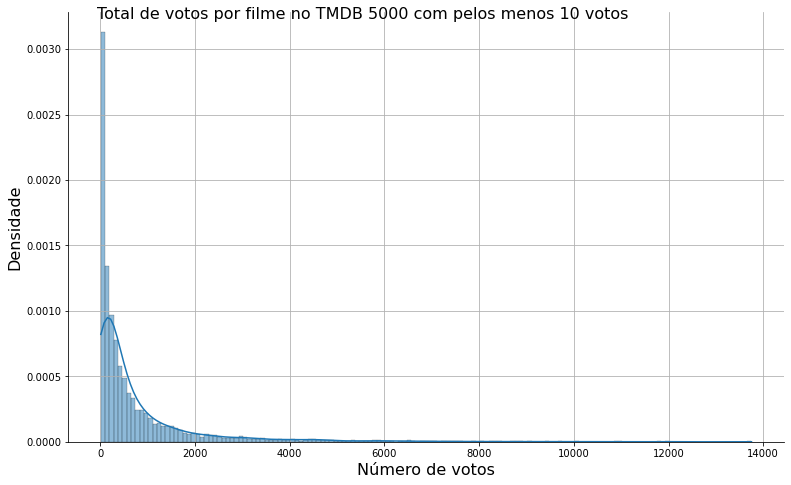

In [29]:
ax = sns.displot(
    data=tmdb_com_mais_de_10_votos, 
    x="vote_count", 
    kde=True,
    stat="density"
)
ax.set_xlabels("Número de votos", fontsize=16)
ax.set_ylabels("Densidade", fontsize=16)
ax.figure.suptitle("Total de votos por filme no TMDB 5000 com pelos menos 10 votos", fontsize=16)
ax.figure.set_size_inches(13, 7)
ax
plt.grid()

In [30]:
gastos = tmdb.query("budget > 0")["budget"]
gastos.head()

0    237000000
1    300000000
2    245000000
3    250000000
4    260000000
Name: budget, dtype: int64

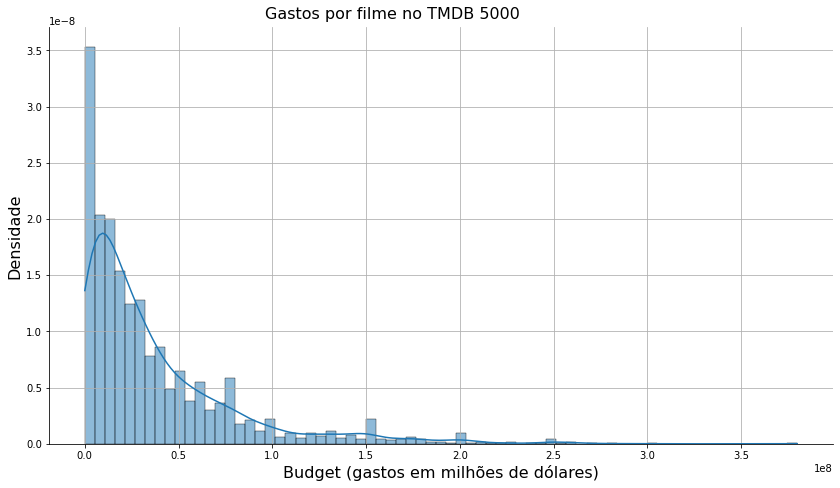

In [31]:
ax = sns.displot(
    data=gastos.values, 
    kde=True,
    stat="density"
)
ax.set_xlabels("Budget (gastos em milhões de dólares)", fontsize=16)
ax.set_ylabels("Densidade", fontsize=16)
ax.figure.suptitle("Gastos por filme no TMDB 5000", fontsize=16)
ax.figure.set_size_inches(13, 7)
ax
plt.grid()

In [32]:
# analisando a populariadade dos filmes

tmdb["popularity"].head()

0    150.437577
1    139.082615
2    107.376788
3    112.312950
4     43.926995
Name: popularity, dtype: float64

In [33]:
# temos algum filme com popularidade igual a zero?

tmdb.query("popularity == 0")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


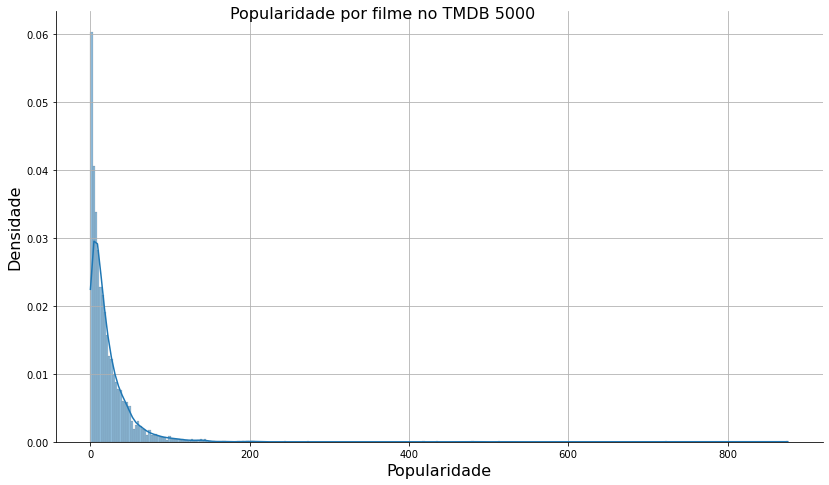

In [34]:
ax = sns.displot(
    data=tmdb,
    x="popularity",
    kde=True,
    stat="density"
)
ax.set_xlabels("Popularidade", fontsize=16)
ax.set_ylabels("Densidade", fontsize=16)
ax.figure.suptitle("Popularidade por filme no TMDB 5000", fontsize=16)
ax.figure.set_size_inches(13, 7)
ax
plt.grid()

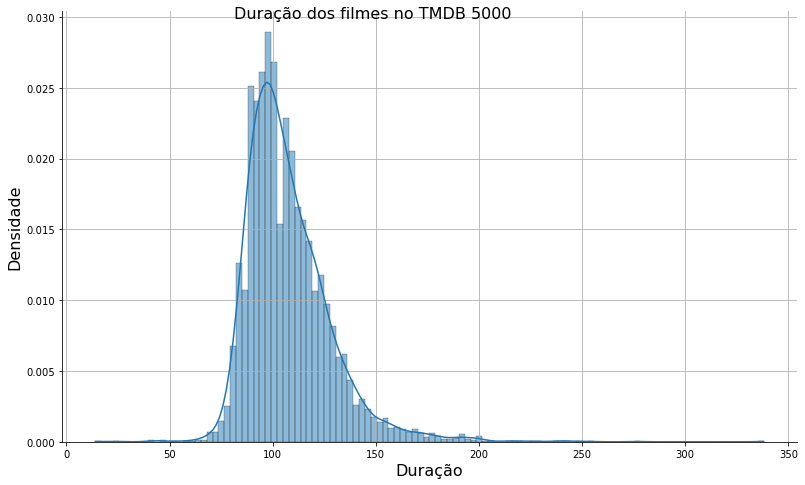

In [35]:
ax = sns.displot(
    data=tmdb.query("runtime > 0").runtime.dropna(),
    kde=True,
    stat="density"
)
ax.set_xlabels("Duração", fontsize=16)
ax.set_ylabels("Densidade", fontsize=16)
ax.figure.suptitle("Duração dos filmes no TMDB 5000", fontsize=16)
ax.figure.set_size_inches(13, 7)
ax
plt.grid()

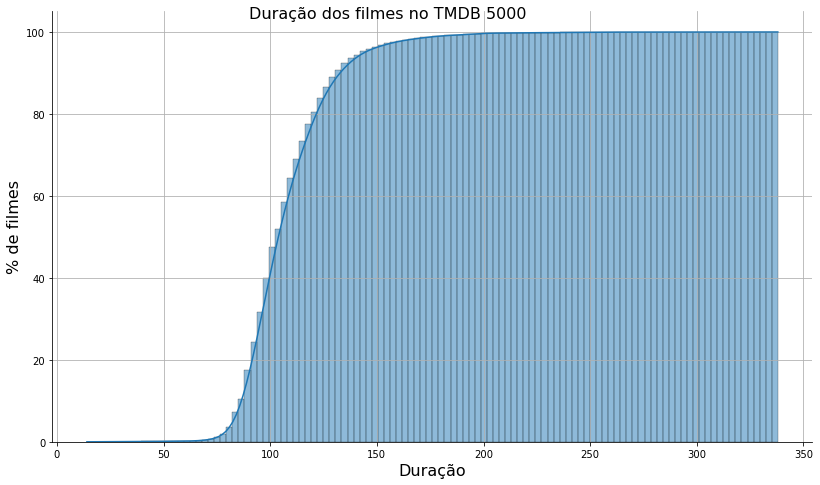

In [36]:
ax = sns.displot(
    data=tmdb.query("runtime > 0").runtime.dropna(),
    kde=True,
    stat="percent",
    cumulative=True
)
ax.set_xlabels("Duração", fontsize=16)
ax.set_ylabels("% de filmes", fontsize=16)
ax.figure.suptitle("Duração dos filmes no TMDB 5000", fontsize=16)
ax.figure.set_size_inches(13, 7)
ax
plt.grid()

In [37]:
tmdb.query("runtime>0").runtime.dropna().quantile(q=0.8)

121.0

## Movielens: média dos filmes com pelo menos 10 votos

In [38]:
print("Média dos filmes com pelo menos 10 votos: {}".format(nota_media_dos_filmes_com_pelo_menos_10_votos.mean(), 3))

Média dos filmes com pelo menos 10 votos: 3.4320503405352603


In [39]:
medias = list()
for i in range(1, len(nota_media_dos_filmes_com_pelo_menos_10_votos)):
    medias.append(nota_media_dos_filmes_com_pelo_menos_10_votos[0:i].mean())
# medias

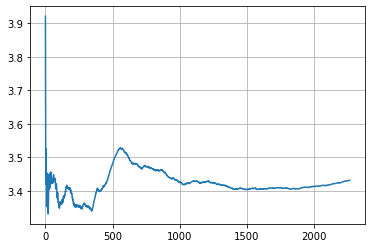

In [40]:
plt.plot(medias)
plt.grid()

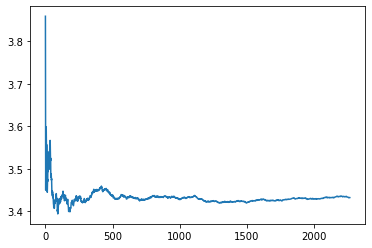

In [41]:
np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

In [42]:
zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

In [43]:
descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)

In [44]:
descr_todos_com_10_votos.tconfint_mean()

(3.411234839229379, 3.4528658418411378)

## Vamos ver o filme 1...

In [45]:
filmes = pd.read_csv("movies.csv")

filmes.query("movieId == 1")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [46]:
notas1 = notas.query("movieId == 1")
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


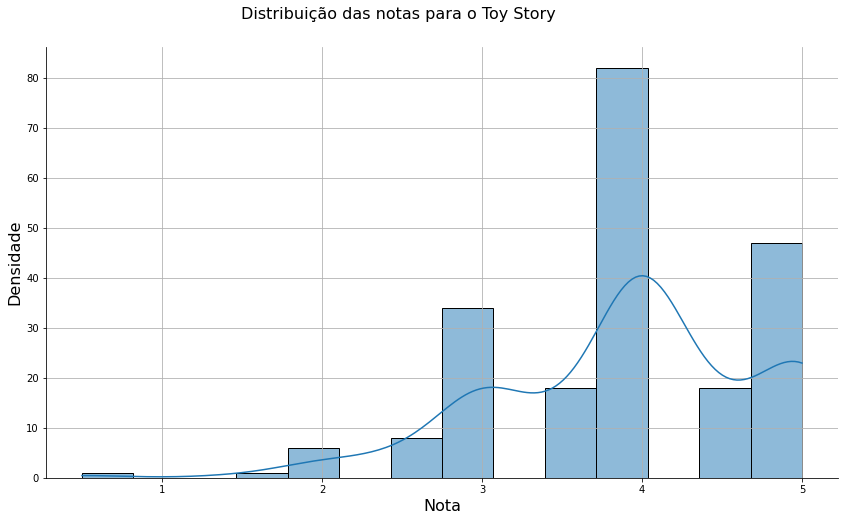

In [47]:
ax = sns.displot(data=notas1, x="rating", kde=True)
ax.set_xlabels("Nota", fontsize=16)
ax.set_ylabels("Densidade", fontsize=16)
ax.figure.suptitle("Distribuição das notas para o Toy Story", fontsize=16, y=1.05)
ax.figure.set_size_inches(13, 7)
ax
plt.grid()

<AxesSubplot:xlabel='Nota'>

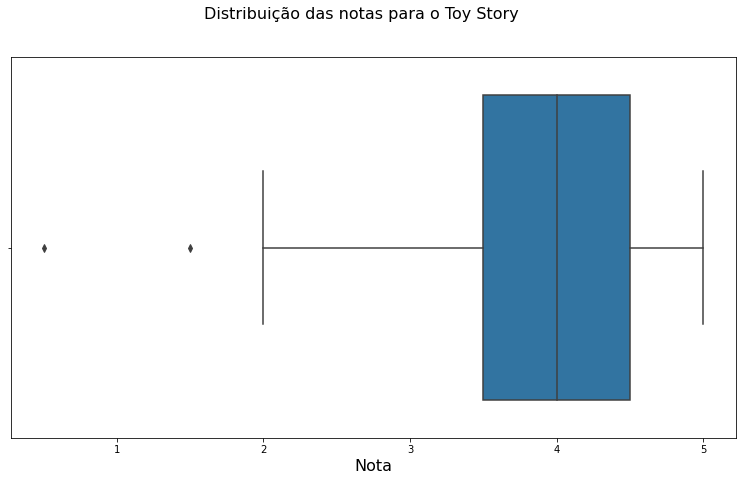

In [48]:
ax = sns.boxplot(data=notas1, x="rating")
ax.set_xlabel("Nota", fontsize=16)
ax.figure.suptitle("Distribuição das notas para o Toy Story", fontsize=16)
ax.figure.set_size_inches(13, 7)
ax

In [49]:
notas1["rating"].mean() # média das notas do filme Toy Story

3.9209302325581397

In [50]:
# Para termos uma análise mais objetiva dessa média, já que
# temos mais de 30 registros no nosso conjunto, podemos aplicar o Teste Z.

zconfint(notas1["rating"])

(3.8093359183563402, 4.032524546759939)

In [51]:
# Esse teste nos devolverá um pvalue que nos informará se, no mundo real, 
# a média desse filme seria ou não igual a 3.4320503405352603 (a nota média do TMDB).

ztest(notas1["rating"], value=3.4320503405352603)

(8.586342305916716, 8.978190401886942e-18)

In [52]:
# Repare que este último é um valor bastante baixo, e bem menor 
# que o nosso 0.05 (o alpha). Portanto, podemos descartar a hipótese de que, 
# no mundo real, a média do Toy Story é igual a 3.4320503405352603 (também chamada de hipótese nula).

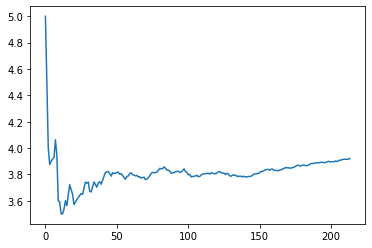

In [53]:
# Perceba que, conforme esse conjunto vai se tornando maior, menos as 
# novas amostras influenciam na média total - já que, visualmente, nossa distribuição se assemelha a uma normal:

np.random.seed(75241)
temp = notas1.sample(frac=1).rating

medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)

In [54]:
# Criaremos, então, uma função calcula_teste(i). 
# Nela, colocaremos o código referente à media do trecho analisado (temp[0:i].mean()). 
# Além disso, aplicaremos o ztest() para essas notas, estipulando como 
# referência o valor 3.4320503405352603. Essa função nos dará dois retornos: stat e p.

np.random.seed(75241)
temp = notas1.sample(frac=1).rating

def calcula_teste(i):
    media = temp[0:i].mean()
    stat, p = ztest(temp[0:i], value = 3.4320503405352603) 
    return (i, media, p)

valores = np.array([calcula_teste(i) for i in range(2, len(temp))])
valores

array([[2.00000000e+00, 4.50000000e+00, 3.26876211e-02],
       [3.00000000e+00, 4.00000000e+00, 3.25254351e-01],
       [4.00000000e+00, 3.87500000e+00, 2.99521970e-01],
       [5.00000000e+00, 3.90000000e+00, 1.58267818e-01],
       [6.00000000e+00, 3.91666667e+00, 7.40693646e-02],
       [7.00000000e+00, 3.92857143e+00, 3.05837219e-02],
       [8.00000000e+00, 4.06250000e+00, 8.54684682e-03],
       [9.00000000e+00, 3.94444444e+00, 3.43513698e-02],
       [1.00000000e+01, 3.60000000e+00, 6.79775744e-01],
       [1.10000000e+01, 3.59090909e+00, 6.66104056e-01],
       [1.20000000e+01, 3.50000000e+00, 8.45259443e-01],
       [1.30000000e+01, 3.50000000e+00, 8.31972270e-01],
       [1.40000000e+01, 3.53571429e+00, 7.28503654e-01],
       [1.50000000e+01, 3.60000000e+00, 5.56156495e-01],
       [1.60000000e+01, 3.56250000e+00, 6.28416636e-01],
       [1.70000000e+01, 3.64705882e+00, 4.20561961e-01],
       [1.80000000e+01, 3.72222222e+00, 2.69271809e-01],
       [1.90000000e+01, 3.68421

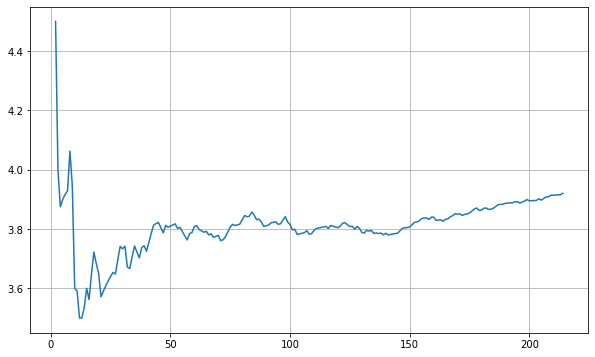

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(valores[:, 0], valores[:, 1])
plt.grid()

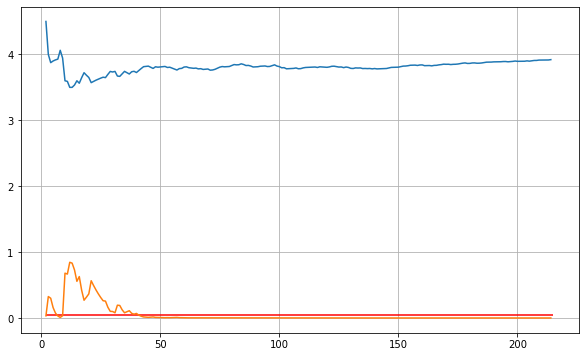

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(valores[:,0],valores[:,1])
plt.plot(valores[:,0],valores[:,2])
plt.hlines(y = 0.05, xmin = 2, xmax = len(temp), colors = 'r')
plt.grid()

In [57]:
# Agora, analisando nosso gráfico, podemos enxergar em que pontos o p value 
# é maior que 0.05. Repare que tivemos sorte (ou azar) de que a ordem das 
# notas fez com que a média começasse muito alta, caísse, ficasse 
# próxima à média de todos os filmes e depois se distanciasse novamente.

# O Teste Z é realizado quando temos um número grande de amostras - por exemplo, a partir de 50.

# Ou seja, na prática esse tipo de gráfico não é executado, nós apenas queríamos visualizar 
# as consequências de trabalharmos com um conjunto pequeno de dados. 
# Uma possibilidade seria cairmos em uma situação na qual não teríamos evidências 
# suficientes para descartar a hipótese nula (de que a média é igual a 3.4320503405352603), 
# concluindo, portanto, que a média do Toy Story é igual àquela usada como referência.

# Nessa situação, poderia-se afirmar, a partir do Teste Z:

# que não há evidências para descartar a hipótese nula
# que não há dados suficientes para tirar essa conclusão

# É importante, em nossas análises, evidenciarmos qual o tamanho da 
# amostra e qual o "p value" para que as pessoas tenham uma noção clara do comportamento dos dados.

## Comparação de dois conjuntos de amostras

In [58]:
print("p value é: {}".format(ztest(notas1["rating"], notas["rating"])))

zconfint(notas1["rating"], notas["rating"])

p value é: (5.894327101501841, 3.762112778881965e-09)


(0.2799245129192442, 0.5588219849631111)

In [59]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

ttest_ind(notas1["rating"], notas["rating"])

Ttest_indResult(statistic=5.894327101501841, pvalue=3.774003138720876e-09)

In [60]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.DescrStatsW.get_compare.html#statsmodels.stats.weightstats.DescrStatsW.get_compare

descr_todas_as_notas = DescrStatsW(notas["rating"])
descr_toy_story = DescrStatsW(notas1["rating"])

comparacao = descr_todas_as_notas.get_compare(descr_toy_story)
comparacao

In [63]:
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [64]:
# t-test:

# comparacao.summary(use_t = True)

# Ou

# comparacao.summary()

# z-test:

# comparacao.summary(use_t = False)

In [65]:
comparacao.summary(use_t=False)

,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

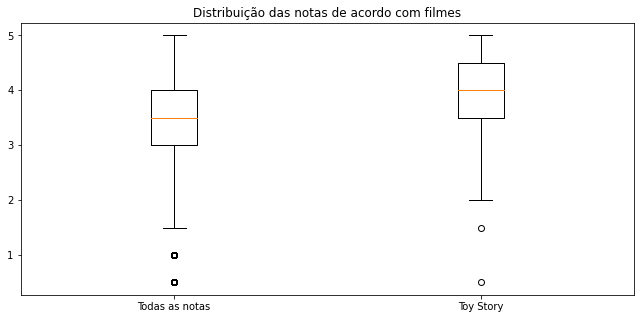

In [71]:
plt.figure(figsize=(11,5))
plt.boxplot([notas["rating"], notas1["rating"]], labels=["Todas as notas", "Toy Story"])
plt.title("Distribuição das notas de acordo com filmes")

Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

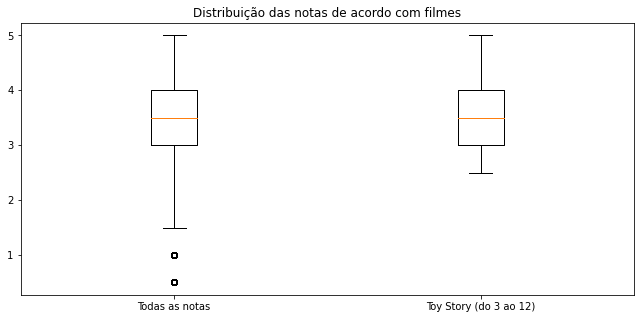

In [73]:
plt.figure(figsize=(11,5))
plt.boxplot([notas["rating"], notas1[3:12]["rating"]], labels=["Todas as notas", "Toy Story (do 3 ao 12)"])
plt.title("Distribuição das notas de acordo com filmes")

In [75]:
descr_todas_as_notas = DescrStatsW(notas["rating"])
descr_toy_story = DescrStatsW(notas1[3:12]["rating"])

comparacao = descr_todas_as_notas.get_compare(descr_toy_story)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0540,0.348,-0.155,0.877,-0.735,0.627


In [76]:
# Como nosso "p value" é 0.877, não podemos descartar a hipótese nula 
# (de que as médias desses conjuntos são iguais). Já o intervalo de confiança 
# vai de -0.735 até 0.627 - um intervalo discrepante e que não permite sabermos 
# se uma média é maior ou menor do que a outra, impedindo, também, que tomemos 
# uma decisão em relação a essa comparação. Dessa forma, nossas únicas alternativas 
# são assumirmos que elas são iguais ou que simplesmente não temos dados suficientes para essa análise.

# Uma outra situação possível seria obtermos um "p value" indicando que as duas médias 
# são diferentes, mas um intervalo de confiança entre -0.02 a -0.01 - ou seja, uma diferença 
# pouquíssimo significativa quando estamos tratando da qualidade de um filme. Óbvio que, em 
# outros casos, como na taxa de recuperação de pacientes utilizando um medicamento, 
# uma diferença de 1% ou 2% a mais ou a menos seria bastante expressiva.

# Portanto, em nossas análises estatísticas, devemos prestar atenção não só ao "p value", 
# como também ao intervalo de confiança e a como esses valores se aplicam à situação 
# com a qual estamos trabalhando.

## Comparando a média de mais dois filmes

In [77]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [79]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [78]:
filmes.query("movieId in [1, 593, 72226]")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


In [84]:
notas1 = notas.query("movieId == 1")
notas593 = notas.query("movieId == 593")
notas72226 = notas.query("movieId == 72226")

Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

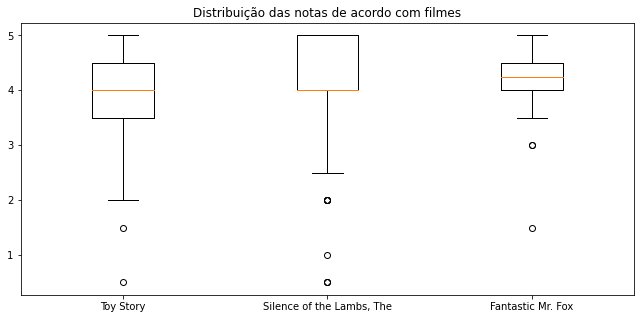

In [83]:
plt.figure(figsize=(11,5))
plt.boxplot(
    [
        notas1["rating"], 
        notas593["rating"], 
        notas72226["rating"]
    ], 
    labels=["Toy Story", "Silence of the Lambs, The", "Fantastic Mr. Fox"]
)
plt.title("Distribuição das notas de acordo com filmes")

In [85]:
notas1.describe()

,userId,movieId,rating,timestamp
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [86]:
notas593.describe()

,userId,movieId,rating,timestamp
count,279.000000,279.0,279.000000,2.790000e+02
mean,306.577061,593.0,4.161290,1.147081e+09
std,179.731115,0.0,0.853983,2.444652e+08
min,1.000000,593.0,0.500000,8.319402e+08
25%,141.000000,593.0,4.000000,9.393810e+08
50%,313.000000,593.0,4.000000,1.123891e+09
75%,454.000000,593.0,5.000000,1.405808e+09
max,610.000000,593.0,5.000000,1.537158e+09


In [87]:
notas72226.describe()

,userId,movieId,rating,timestamp
count,18.000000,18.0,18.000000,1.800000e+01
mean,329.722222,72226.0,4.083333,1.395218e+09
std,174.748157,0.0,0.895249,9.459862e+07
min,73.000000,72226.0,1.500000,1.262899e+09
25%,167.000000,72226.0,4.000000,1.279706e+09
50%,326.000000,72226.0,4.250000,1.441777e+09
75%,466.250000,72226.0,4.500000,1.471770e+09
max,610.000000,72226.0,5.000000,1.498522e+09


In [88]:
descr_1 = DescrStatsW(notas1["rating"])
descr_593 = DescrStatsW(notas593["rating"])
comparacao = descr_1.get_compare(descr_593)

comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [90]:
descr_72226 = DescrStatsW(notas72226["rating"])
descr_593 = DescrStatsW(notas593["rating"])
comparacao = descr_72226.get_compare(descr_593)

comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


In [91]:
comparacao = descr_1.get_compare(descr_72226)

comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.1624,0.206,-0.788,0.431,-0.568,0.243


In [92]:
notas.query("movieId in (1, 593, 72226)").groupby("movieId").count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


In [96]:
_, p = normaltest(notas1["rating"])
p

0.00011053430732728716

In [ ]:
# Teremos um p value de 0.00011053430732728716 - ou seja, menor do que 0.05. 
# Como essa função testa a hipótese nula de que o conjunto de dados venha de 
# uma distribuição normal, um resultado menor que 0.05 indica que não estamos 
# trabalhando com uma distribuição normal.

# Isso também significa que não poderíamos aplicar o Teste T ou o Teste Z, mas 
# sim testes que funcionam com outros tipos de distribuição.

In [99]:
_, p = ranksums(notas1["rating"], notas593["rating"])
p

0.0003267718756440693

In [100]:
# Nesse caso, o p value é significativo, descartando a hipótese nula. 
# No ranksums(), a hipótese nula é de que as duas amostras vieram da mesma 
# distribuição. Já a hipótese alternativa, que admitiremos nesse caso 
# (já que o p value foi bem pequeno), é a de que os valores de uma amostra 
# têm uma tendência a serem maiores que os da outra amostra.

# Repare que, quando trabalhamos com Teste T e Teste Z estávamos nos 
# referindo às médias - o que fazia sentido em uma distribuição normal. 
# Porém, em uma distribuição não paramétrica, não usamos as médias, mas 
# sim amostras aleatórias de cada conjunto testado.

# Ou seja, se pegarmos notas aleatórias para Toy Story e Silence of the Lambs, 
# as notas deste último, em geral, são maiores. Análises como essa, junto com as 
# médias, os boxplots, os histogramas e outras informações que aprendemos a testar 
# anteriormente, nos permitem concluir quando um filme é melhor que outro.